## Data Exploration

Key Hypothesis: Behavioural engagement patterns (e.g., social comparison, validation seeking, purposeless usage) exhibit stronger associations with depressive symptoms than total time spent on social media.

In [2]:
pip install kagglehub


   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [protobuf]
   ---------- ----------------------------- 1/4 [protobuf]
   ---------- ----------------------------- 1/4 [protobuf]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   ------------------------------ --------- 3/4 [kagglehub]
   ------------------------------ --------- 3/4 [kagglehub]
   ---------------------------------------- 4/4 [kagglehub]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub

path = kagglehub.dataset_download("souvikahmed071/social-media-and-mental-health")

print("Dataset downloaded to:", path)

import os
print("Files inside dataset folder:")
print(os.listdir(path))


100%|██████████| 10.7k/10.7k [00:00<00:00, 427kB/s]

Extracting files...
Dataset downloaded to: C:\Users\206910279\.cache\kagglehub\datasets\souvikahmed071\social-media-and-mental-health\versions\15
Files inside dataset folder:
['smmh.csv']


In [33]:
import pandas as pd
import os

file_name = "smmh.csv"
data = pd.read_csv(os.path.join(path, file_name))

display(data.head())
print(data.columns)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [34]:
data["Depression_Score"] = (
    data["18. How often do you feel depressed or down?"] +
    data["19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?"] +
    data["20. On a scale of 1 to 5, how often do you face issues regarding sleep?"]
)

In [35]:
time_map = {
    "Less than an hour": 0.5,
    "Between 1 and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "Between 4 and 5 hours": 4.5,
    "More than 5 hours": 6
}

data["SM_Hours_Numeric"] = data["8. What is the average time you spend on social media every day?"].map(time_map)


In [36]:
corr = data.corr(numeric_only=True)
corr["Depression_Score"].sort_values(ascending=False)


Depression_Score                                                                                                        1.000000
18. How often do you feel depressed or down?                                                                            0.797818
19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?                              0.762613
20. On a scale of 1 to 5, how often do you face issues regarding sleep?                                                 0.756710
14. Do you find it difficult to concentrate on things?                                                                  0.584886
13. On a scale of 1 to 5, how much are you bothered by worries?                                                         0.575959
12. On a scale of 1 to 5, how easily distracted are you?                                                                0.502587
10. How often do you get distracted by Social media when you are busy doing something?           

In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


KeyError: '15. On a scale of 1-5, how often do you compare yourself...'

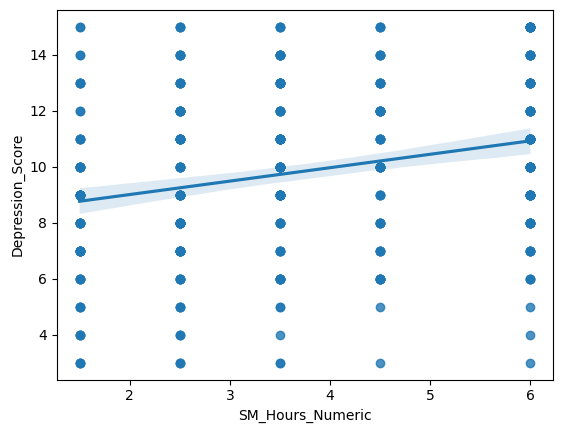

In [39]:
import seaborn as sns

sns.regplot(x="SM_Hours_Numeric", y="Depression_Score", data=data)
sns.regplot(x="15. On a scale of 1-5, how often do you compare yourself...", y="Depression_Score", data=data)
